In [6]:
from pathlib import Path
from typing import List
from urllib.request import urlretrieve
import pandas as pd
from sklearn.preprocessing import StandardScaler


class DataLoader:
    """Class to load and preprocess the political parties dataset"""

    data_url: str = "https://www.chesdata.eu/s/CHES2019V3.dta"

    def __init__(self):
        self.party_data = self._download_data()
        self.non_features = ['eu_econ_require', 'eu_political_require', 'eu_googov_require']   
        self.index = ["party_id", "party", "country"]

    def _download_data(self) -> pd.DataFrame:
        return pd.read_stata("/home/ravi0531rp/Desktop/CODES/u-miscellaneous/datascientist-politicalparties-python/data/CHES2019V3.dta")

    def remove_duplicates(self, df: pd.DataFrame) -> pd.DataFrame:
        """Removes duplicate rows from the DataFrame."""
        return df.drop_duplicates()

    def remove_nonfeature_cols(
        self, df: pd.DataFrame, non_features: List[str], index: List[str]
    ) -> pd.DataFrame:
        """Removes specified non-feature columns and sets index columns."""
        df = df.drop(columns=non_features, errors='ignore')
        return df.set_index(index)

    def handle_NaN_values(self, df: pd.DataFrame) -> pd.DataFrame:
        """Fills NaN values with the median of each numeric column."""
        df = df.fillna(df.median())
        return df

    def scale_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """Scales only the numeric features using StandardScaler."""
        scaler = StandardScaler()
        df[:] = scaler.fit_transform(df)
        return df

    def preprocess_data(self) -> pd.DataFrame:
        """Combines all preprocessing steps and returns the processed DataFrame."""
        df = self.party_data.copy()
        print("Data Loaded")
        df = self.remove_duplicates(df)
        print("Duplicates Removed")
        df = self.remove_nonfeature_cols(df, self.non_features, self.index)
        print("Non Feature columns removed")
        df = self.handle_NaN_values(df)
        print("Nan handled")
        df = self.scale_features(df)
        print("Features scaled")
        return df

In [7]:
data_loader = DataLoader()
preprocessed_data = data_loader.preprocess_data()

Data Loaded
Duplicates Removed
Non Feature columns removed
Nan handled
Features scaled


In [55]:
preprocessed_data.columns

Index(['eastwest', 'eu_position', 'eu_position_sd', 'eu_salience',
       'eu_dissent', 'eu_blur', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'lrgen', 'lrecon', 'lrecon_sd',
       'lrecon_salience', 'lrecon_dissent', 'lrecon_blur', 'galtan',
       'galtan_sd', 'galtan_salience', 'galtan_dissent', 'galtan_blur',
       'immigrate_policy', 'immigrate_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite',
       'antielite_salience', 'corrupt_salience', 'members_vs_leadership'],
      dtype='object')

In [29]:
preprocessed_data.head()


,,,eastwest,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
party_id,party,country,,,,,,,,,,,,,,,,,,,,,
102.0,PS,be,0.769386,0.677676,-1.411129,-0.990515,0.128429,-0.680053,0.713300,0.976172,-0.263495,0.352328,...,-0.611732,-0.678827,0.527938,0.820575,-1.20645,-0.317593,-0.727529,-0.864042,-1.049322,0.345949
103.0,SP/SPA,be,0.769386,0.629251,-1.059985,-1.045945,-0.049157,-0.938634,0.493536,0.976172,-0.263495,0.626530,...,-0.752165,-0.852606,0.249590,0.437647,-1.20645,-0.273124,-0.630913,-0.899349,-1.162645,-0.035948
104.0,ECOLO,be,0.769386,0.968224,-0.834278,-0.657939,-0.049157,-1.101948,0.493536,1.133444,-0.263495,0.717930,...,-1.256576,-1.478209,0.295982,0.916306,-1.20645,-0.006315,0.480173,-0.758121,-0.860450,-1.665373
105.0,AGALEV,be,0.769386,0.968224,-0.834278,-0.657939,-0.049157,-1.183605,0.383653,1.133444,-0.263495,0.717930,...,-1.193524,-1.426076,0.342373,0.868441,-1.20645,-0.050783,0.480173,-0.793428,-1.011548,-1.614453
106.0,PRL/MR,be,0.769386,0.919799,-0.428203,-0.491651,-0.404330,-0.938634,0.054007,1.212080,0.642440,1.266333,...,-0.657587,-0.099565,-1.281319,1.059904,-1.20645,-0.228656,-0.051216,-1.040576,-1.162645,0.065891


In [8]:
type(preprocessed_data)

pandas.core.frame.DataFrame

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from typing import Literal


class DimensionalityReducer:
    """Class to model dimensionality reduction using PCA for the given dataset."""

    def __init__(self, data: pd.DataFrame, n_components: int = 2):
        self.n_components = n_components
        self.data = data
        self.feature_columns = data.columns
        self.model = None

    def reduce_pca(self) -> pd.DataFrame:
        """Reduces dimensions using Principal Component Analysis (PCA)."""
        pca = PCA(n_components=self.n_components)
        reduced_data = pca.fit_transform(self.data)
        self.model = pca  
        return pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(self.n_components)])

    def reduce(self, method: Literal['pca'] = 'pca') -> pd.DataFrame:
        """General method to apply dimensionality reduction using PCA."""
        if method == 'pca':
            return self.reduce_pca()
        else:
            raise ValueError("Unsupported reduction method. Currently, only 'pca' is available.")

    def inverse_transform(self, reduced_data: pd.DataFrame) -> pd.DataFrame:
        """Reverses the dimensionality reduction using the trained PCA model."""
        if isinstance(self.model, PCA):
            # PCA supports inverse transform
            original_data = self.model.inverse_transform(reduced_data)
            return pd.DataFrame(original_data, columns=self.feature_columns)
        else:
            raise NotImplementedError("Inverse transformation is only supported for PCA.")




In [10]:
reducer = DimensionalityReducer(preprocessed_data)
pca_result = reducer.reduce(method='pca')

In [11]:
pca_result.shape

(277, 2)

In [12]:
reducer.model

PCA(n_components=2)

In [13]:
type(pca_result)

pandas.core.frame.DataFrame

In [53]:
from itertools import cycle
from typing import List, Optional

import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot


def scatter_plot(
    transformed_data: pd.DataFrame,
    color: str = "y",
    size: float = 2.0,
    splot: Optional[pyplot.Axes] = None,
    label: Optional[List[str]] = None,
):
    """Generates a 2D scatter plot."""
    if splot is None:
        splot = pyplot.subplot()
    columns = transformed_data.columns
    splot.scatter(
        transformed_data.loc[:, columns[0]],
        transformed_data.loc[:, columns[1]],
        s=size,
        c=color,
        label=label,
        alpha=0.7,
        edgecolors='w',
    )
    splot.set_aspect("equal", "box")
    splot.set_xlabel("1st Component")
    splot.set_ylabel("2nd Component")
    if label:
        splot.legend()

def plot_density_estimation_results(
    X: pd.DataFrame,
    Y_: np.ndarray,
    
    means: np.ndarray,
    covariances: np.ndarray,
    title: str,
):
    """Plots Gaussian Mixture density estimation results."""
    color_iter = cycle(["navy", "c", "cornflowerblue", "gold", "darkorange", "g"])
    pyplot.figure(figsize=(8, 6))
    splot = pyplot.subplot()
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue
        scatter_plot(X.loc[Y_ == i], color=color, splot=splot, label=f"Cluster {i}")
        angle = np.arctan2(u[1], u[0])
        angle = 180.0 * angle / np.pi
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    pyplot.title(title)
    pyplot.xlabel("1st Component")
    pyplot.ylabel("2nd Component")
    pyplot.show()


def plot_finnish_parties(transformed_data: pd.DataFrame, splot: Optional[pyplot.Axes] = None):
    """Plots Finnish political parties on a 2D scatter plot."""
    finnish_parties = [
        {"parties": ["SDP", "VAS", "VIHR"], "country": "fin", "color": "r"},
        {"parties": ["KESK", "KD"], "country": "fin", "color": "g"},
        {"parties": ["KOK", "SFP"], "country": "fin", "color": "b"},
        {"parties": ["PS"], "country": "fin", "color": "k"},
    ]

    if splot is None:
        _, splot = pyplot.subplots(figsize=(4, 3))

    for group in finnish_parties:
        # Adjusting to filter using the correct index levels by position
        subset = transformed_data[
            (transformed_data.index.get_level_values(2) == group["country"]) &  # 2 is for 'country'
            (transformed_data.index.get_level_values(1).isin(group["parties"]))  # 1 is for 'party'
        ]
        scatter_plot(
            subset[[subset.columns[0], subset.columns[1]]],
            color=group["color"],
            splot=splot,
            label=", ".join(group["parties"]),
            size = 20
        )
    splot.set_title("Finnish Political Parties in 2D Space")
    splot.set_xlabel("1st Component")
    splot.set_ylabel("2nd Component")
    splot.legend()
    pyplot.show()




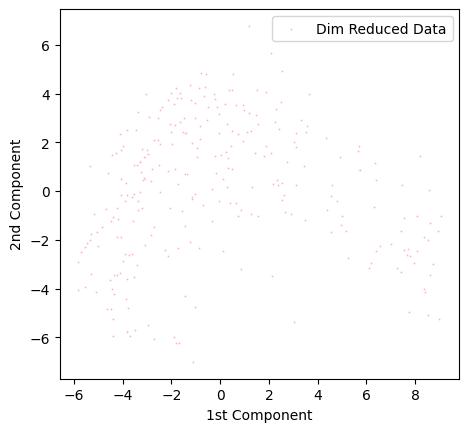

In [34]:
from matplotlib import pyplot

pyplot.figure()
splot = pyplot.subplot()
scatter_plot(
    pca_result,
    color="r",
    splot=splot,
    label="Dim Reduced Data",
)

In [35]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture


class DensityEstimator:
    """Class to estimate Density/Distribution of the given data using a Gaussian Mixture Model (GMM).
    1. Write a function to model the distribution of the political party dataset using GMM
    2. Write a function to randomly sample 10 parties from this distribution
    3. Map the randomly sampled 10 parties back to the original higher-dimensional space
    as per the previously used dimensionality reduction technique.
    """

    def __init__(self, data: pd.DataFrame, dim_reducer, high_dim_feature_names, n_components: int = 3):
        """
        Initialize the DensityEstimator with the provided data, dimensionality reducer, 
        feature names, and the number of components for GMM.
        """
        self.data = data
        # Access the trained PCA model from the dim_reducer instance
        self.dim_reducer_model = dim_reducer.model  # Accessing model from DimensionalityReducer
        self.feature_names = high_dim_feature_names
        self.gmm_model = None
        self.n_components = n_components  # Default to 3 components for GMM
        
    def fit_distribution(self) -> GaussianMixture:
        """Fit a Gaussian Mixture Model to the data."""
        gmm = GaussianMixture(n_components=self.n_components)
        gmm.fit(self.data)
        self.gmm_model = gmm
        return gmm

    def sample_from_distribution(self, n_samples: int = 10) -> np.ndarray:
        """Randomly sample 10 data points from the fitted GMM distribution."""
        if self.gmm_model is None:
            raise ValueError("The distribution is not fitted yet. Please call 'fit_distribution' first.")
        
        # Sample from the GMM
        sampled_data, _ = self.gmm_model.sample(n_samples)
        return sampled_data

    def map_back_to_original_space(self, reduced_data: pd.DataFrame) -> pd.DataFrame:
        """Map the sampled data back to the original high-dimensional space."""
        # Using inverse transform from PCA model
        return self.dim_reducer_model.inverse_transform(reduced_data)

    def predict(self, new_data: pd.DataFrame) -> np.ndarray:
        """Predict the density of a given data point in the fitted GMM distribution."""
        if self.gmm_model is None:
            raise ValueError("The distribution is not fitted yet. Please call 'fit_distribution' first.")
        
        # Predict the log likelihood of the data points
        log_density = self.gmm_model.score_samples(new_data)  # Returns log of the density
        return np.exp(log_density)  # Return the actual density (exponentiate the log density)



In [36]:
density_estimator = DensityEstimator(pca_result, reducer, preprocessed_data.columns)


In [37]:
gmm = density_estimator.fit_distribution()

In [38]:
gmm

GaussianMixture(n_components=3)

In [39]:
sampled_data = density_estimator.sample_from_distribution(n_samples=10)

sampled_data

array([[-3.571287  , -0.22579844],
       [-4.75414893, -3.21782037],
       [-3.38406944,  0.11826276],
       [-5.01883762, -2.61086678],
       [-4.64299796, -5.79169407],
       [-2.43254107,  0.70103131],
       [ 4.82309995, -0.79105043],
       [-1.77717042,  2.86133975],
       [-2.54442191,  0.97760876],
       [ 3.08079136,  2.44355305]])

In [40]:
preds = density_estimator.gmm_model.predict(pca_result)

In [41]:
preds

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2,
       0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2])

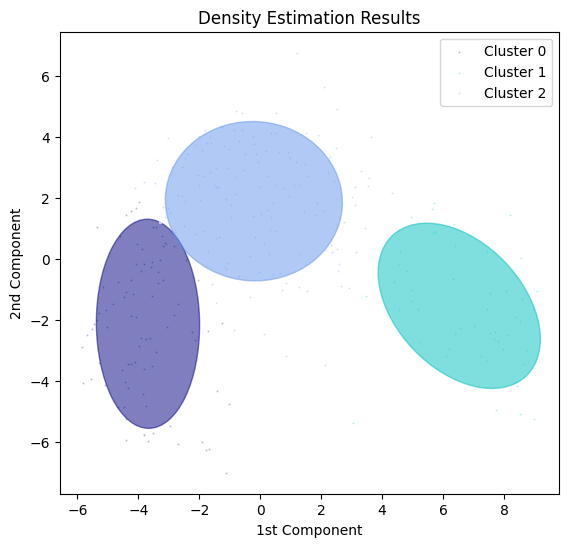

In [42]:
plot_density_estimation_results(
        pca_result,
        density_estimator.gmm_model.predict(pca_result),
        density_estimator.gmm_model.means_,
        density_estimator.gmm_model.covariances_,
        title="Density Estimation Results"
    )

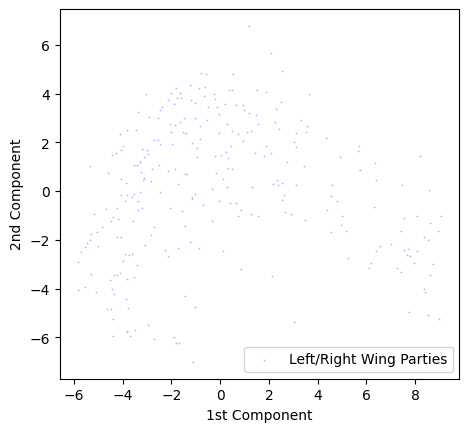

In [43]:
pyplot.figure()
splot = pyplot.subplot()
scatter_plot(
    pca_result,
    color="b",
    splot=splot,
    label="Left/Right Wing Parties"
)

In [44]:
pca_result_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_result_df.index = preprocessed_data.index
plot_finnish_parties(pca_result_df)



In [45]:
pca_result_df.head()

,,,PC1,PC2
party_id,party,country,,
102.0,PS,be,-4.457079,-1.229596
103.0,SP/SPA,be,-4.241959,-0.675504
104.0,ECOLO,be,-5.523132,-2.286796
105.0,AGALEV,be,-5.445747,-2.121826
106.0,PRL/MR,be,-1.895051,3.570018


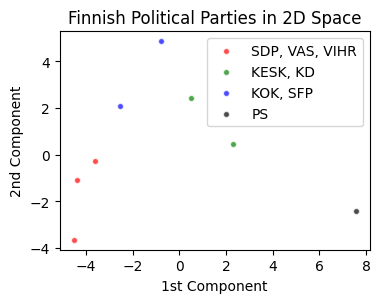

In [54]:
plot_finnish_parties(pca_result_df)
